<a href="https://colab.research.google.com/github/dkutagulla/aiml/blob/AI_ML_ForCoders/Machine_Learning_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notes and code


My notes of ML book I am reading **AI and Machine Learning for Coders**

Notes using TensorFlow API

# TensorFlow version

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.0


# Model 
1. relationship that takes input(s) and produces output(s)
2. contains (set of)  parameters that transform input to output.
idea is to have a set of parameters that can apply to all input(s) values 
Neurons are the individual building blocks of the models

   
# Simple example
Determine relation (model)  between x and y based on input data
1. build the model using a sample of x input values and y output values and use it to predict a value of y given a x value.
2. have tf output parameters of the model.


In [ ]:
import tensorflow as tf
import numpy as np

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

first_layer = Dense( 
    units=1, # how many neurons 
    input_shape=[1] # how many inputs to neuron ;
    # ONLY specified for first layer
    )

# model has array of layers inside the Sequential container 
model = Sequential( 
                   [ # layer description  ; array of layers
                       first_layer
                   ]  
    )

# setup training method sgd = stochastic gradient descent
model.compile(optimizer='sgd', loss='mean_squared_error')

# example data to develop model
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

model.fit(xs, ys, epochs=500) # train model on input data for 500 trials

print("Model predicted value for x=10 : {}" .format ( model.predict([10.0]))) # use model to predict value

# output how model looks like
print("Model parameters: {}".format(
                                    first_layer.get_weights()
                                    ))


# More Complicated Neural Network
## ML for image classification


### Goal 
Train the computer to 'see' twhat type of apparel a given picture shows : e.g. shoe, dress, ankle boot etc) 

###Input 
FashionMNIST: DB of B/W images of apparel. 

### Data structure : Neural network (NN)
3 layer NN 
* 0th layer : flattened input layer ( in order to be able to feed values to neurons). 
Layer consist of series of numbers 
2D Image data converted into a 1D series of numbers
* 1st layer of of 128 neurons
* 2nd layer of 10 output neurons ( since there are 10 classes in image data set) 
128 is a hyperparameter : it specifies how many neurons are present. It is not model parameter but a parameter that determines the structure of the Neural network 
Each layer defines an Activation function. This defines the functionality of each neuron in that lyaer) 



In [ ]:
# hgmodel = keras.Sequential([
#                          keras.layers.Flatten(input_shape=(28, 28)),    
#                          keras.layers.Dense(128, activation=tf.nn.relu),    
#                          keras.layers.Dense(10, activation=tf.nn.softmax)
#                          ])

In [ ]:
import tensorflow as tf

data = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = data.load_data()

training_images  = training_images / 255.0
test_images = test_images / 255.0


model = tf.keras.models.Sequential(
         [
           tf.keras.layers.Flatten(input_shape=(28, 28)), # image flattening layer                                    
           ## the neural network
           tf.keras.layers.Dense(128, activation=tf.nn.relu),
           tf.keras.layers.Dense(10, activation=tf.nn.softmax)
         ]
    )

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)


# Convolutional Neural Networks

To improve model training turnaround time, the number of parameters in model needs to reduced without losing important parameters information useful to train model. 

Convolution and Pooling are two common operations applied in sequence to extract salient features in the model and reduce the input data size while preserving the said features contained in the input data.

##  Convolution 
Convolution is used to emphasize features in am image.

Convolution is implemented as a matrix of coefficients. this matrix is called a filter (a.k.a kernel) . The filter is 'superposed' on top of the image ( which is itself a 28 x 28 matrix) and slid across it while ensuring that the filter matrix does not go out out the image boundary. As the filter matrix is slid across the image, image pixel values are multiplied by filter values and the product is stored into another image matrix. the resultant image matrix is a Convolved version of original image.

In ML Convolution is modelled as a neural network. it consists of neurons. Each neuron performs a  multiplication ( convolution) on each pixel.  The result is fed forward to the output layers where the loss value  ( via loss function) is computed. The error is computed from this loss value and used to compute the scaling factors for filter matrix coefficients. These cofficients are the weights and bias values for that neuron. The cofficients are scaled by the scaling factors and fed back to neuron which computes another convolution value. This process is repeated for each neuron AND repeated as whole until the convolution layer achieves a small loss. 

## Pooling
Pooling is used to reduce image  (input data)  size while keeping features. 
Pooling is typically applied after convolution in order to extract features from convoluted image.  This operation reduces the size of input data and thus improves model performace and accuracy. 

In ML, a Pooling layer is used to reduce the number of wieghts and bias values ( effectively reducing the # of neurons). this helps reduce the size of network and thusimprove computation time improving performance. It also helps to enhance accurace of model. lesser nrurons can mean less noise which prents the model from diverging.  


# More information: 
1. https://homepages.inf.ed.ac.uk/rbf/HIPR2/convolve.htm
2. https://blog.francium.tech/machine-learning-convolution-for-image-processing-42623c8dbec0


Original NN code: 



In [ ]:
import tensorflow as tf
data = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = data.load_data()

training_images = training_images / 255.0
test_images = test_images / 255.0

# the NN definition

# First layer Flatten is only input layer does not have any neurons 
# The 2nd (hidden) and 3rd (output)  layer have 128 and 10 neurons 
# and are densely (Dense)  interconnected.

model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28)),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])

# specify how to train the NN 
model.compile(optimizer='adam',
       loss='sparse_categorical_crossentropy',
       metrics=['accuracy'])

# do the training
model.fit(training_images, training_labels, epochs=5)

model.summary()




NN Code with Covolution and Pooling

In [ ]:
import tensorflow as tf
data = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = data.load_data()

# massage and normalize training data to be 3D 
training_images = training_images.reshape(60000, 28, 28, 1)
training_images = training_images / 255.0

# massage and normalize test data to be 3D 
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255.0

model = tf.keras.models.Sequential([
# convolution and pooling layers                                    
   tf.keras.layers.Conv2D(64, 
                          (3, 3), 
                          activation='relu', 
                          input_shape=(28, 28, 1)),
   tf.keras.layers.MaxPooling2D(2, 2),      
   tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),      
   tf.keras.layers.MaxPooling2D(2,2),      
# NN  input layer
   tf.keras.layers.Flatten(),      
# NN
   tf.keras.layers.Dense(128, activation=tf.nn.relu),
   tf.keras.layers.Dense(10, activation=tf.nn.softmax)    
   ])

model.compile(optimizer='adam',       
              loss='sparse_categorical_crossentropy',       
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=50)

model.evaluate(test_images, test_labels)
model.summary()

In [ ]:
model.summary()

# Complex CNN Example

In this example we will build a CNN that will classify images into one of 2 catehgories : Horsew and Humans.

## Prerequisites
### Connecting Google Drive to Colab
Useful to know how we connect our Gdrive to Google Colab so that we can save/load our files from there.  Below link has useful information on this:
https://www.marktechpost.com/2019/06/07/how-to-connect-google-colab-with-google-drive/

### Saving/Restoring models 
In the code below I have setup logic to save the model data to my gdrive area. In case the training is interrupted I can reload the model and resume from where I left off thus saving valuable time.

Below links provide useful information on model saving and restoring:

https://www.tensorflow.org/guide/keras/save_and_serialize

https://www.tensorflow.org/tutorials/keras/save_and_load

SavedModel format
https://www.tensorflow.org/guide/saved_model




In [14]:
from google.colab import drive
drive.mount('/content/gdrive');


Mounted at /content/gdrive


### Download image data
Example shows also how to download compressed data from URL and extract it into specific directory.



In [ ]:
import urllib.request
import zipfile
import tensorflow as tf

url = "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip"
file_name = "horse-or-human.zip"
training_dir = '/content/gdrive/MyDrive/data/horse-or-human/training/'
urllib.request.urlretrieve(url, file_name)

zip_ref = zipfile.ZipFile(file_name, 'r')
zip_ref.extractall(training_dir)
zip_ref.close()




### Helpers
1. Create a model. This will be helpful when we want to restore a saved model


In [4]:
import tensorflow as tf
def createModel():
  
  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu' , input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(loss='binary_crossentropy',
        optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
        metrics=['accuracy'])

  model.summary()
  return model


### Create Model input data pipeline 
Automatically assign labels to images
This also setup a stream 
1. `ImageDataGenerator`  from keras is used to assign labels to images.
2. `ImageDataGenerator` also sets up input data pipeline to our training 

In [8]:
# Automatically assign labels to images
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
training_dir = '/content/gdrive/MyDrive/data/horse-or-human/training/'

train_generator = train_datagen.flow_from_directory(
  training_dir,
  target_size=(300, 300),
  class_mode='binary'
)

Found 1027 images belonging to 2 classes.


### Setup Callbacks : Save Model, Stop Training
1. save the model every 5 epochs
2. Stop training once desired accuracy is reached


In [43]:
import tensorflow as tf
import os

########################
# CallBacks
#
# 1. save model after every 5 epochs;  believe default batch size is 32 
checkpoint_path = "/content/gdrive/MyDrive/data/hoh_model/training_1/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
batch_size =32;
saveTheModel = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 save_freq = 5 * batch_size,
                                                 verbose=1)
# 2. stop training when desired accuracy is reached
class stopTraining(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.999):
      print("\nReached > 98% accuracy so cancelling training!")
      self.model.stop_training = True

stopTrainingCBObj = stopTraining();
##################






### Setup Model
1. Generate model topology
2. setup the check saving format



In [44]:

model = createModel();
model.save_weights(checkpoint_path.format(epoch=0))

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_95 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_95 (MaxPooling (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_96 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_97 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 33, 33, 64)      

### Train the model
Specify the optimization and loss functions and run them for specifed number of epochs 


In [45]:
# train the Model
history = model.fit(
  train_generator,
  epochs=15,
  callbacks=[saveTheModel, stopTrainingCBObj]
)

# at end of training save in SavedModel format
model.save('/content/gdrive/MyDrive/data/hoh_saved_model/my_model') 


Epoch 1/15
33/33 [==============================] - 84s 3s/step - loss: 0.9264 - accuracy: 0.6128
Epoch 2/15
33/33 [==============================] - 83s 3s/step - loss: 0.2845 - accuracy: 0.8970
Epoch 3/15
33/33 [==============================] - 83s 3s/step - loss: 0.2016 - accuracy: 0.9373
Epoch 4/15
33/33 [==============================] - 83s 2s/step - loss: 0.1112 - accuracy: 0.9629
Epoch 5/15
28/33 [========================>.....] - ETA: 12s - loss: 0.0554 - accuracy: 0.9836
Epoch 00005: saving model to /content/gdrive/MyDrive/data/hoh_model/training_1/cp-0005.ckpt
33/33 [==============================] - 83s 2s/step - loss: 0.0578 - accuracy: 0.9838
Epoch 6/15
33/33 [==============================] - 83s 2s/step - loss: 0.0882 - accuracy: 0.9867
Epoch 7/15
33/33 [==============================] - 83s 2s/step - loss: 0.0136 - accuracy: 0.9970

Reached > 98% accuracy so cancelling training!
INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/data/hoh_saved_model/my_model/a

### Loading a saved model
The learned weights can saved and reloaded into freshly created model. That MOdel can then used to identify images without having retrain it.


In [46]:
checkpoint_path = "/content/gdrive/MyDrive/data/hoh_model/training_1/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
print ("Checkpoint directory : " +  checkpoint_dir)
latest = tf.train.latest_checkpoint(checkpoint_dir)
print ("Latest checkpoint " +  latest)
# Create a new model instance
model = createModel()

# evaluate without loading weights ( untrained model)
loss, acc = model.evaluate(train_generator)
print("Un-Restored model, accuracy: {:5.2f}%".format(100 * acc))
# Load the previously saved weights
model.load_weights(latest)
# evaluate after loading weights ( trained model) 
loss, acc = model.evaluate(train_generator)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))


Checkpoint directory : /content/gdrive/MyDrive/data/hoh_model/training_1
Latest checkpoint /content/gdrive/MyDrive/data/hoh_model/training_1/cp-0005.ckpt
Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_100 (Conv2D)          (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_100 (MaxPoolin (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_101 (MaxPoolin (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_102 (MaxPoolin (N

### Testing model

Code Taken from:

https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/Horse_or_Human_NoValidation.ipynb#scrollTo=DoWp43WxJDNT


In [49]:

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving horse1.jpg to horse1 (1).jpg
Saving horse2.jpg to horse2 (1).jpg
Saving human1PNG..png to human1PNG. (1).png
[0.]
horse1.jpg is a horse
[0.]
horse2.jpg is a horse
[1.]
human1PNG..png is a human


### Effect of convolution and pooling
studying the convolution and pooling layers

In [53]:
!ls /content

 drive		   horse1.jpg	     human1.jpg		   sample_data
 gdrive		  'horse2 (1).jpg'  'human1PNG. (1).png'
'horse1 (1).jpg'   horse2.jpg	     human1PNG.png


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in true_divide


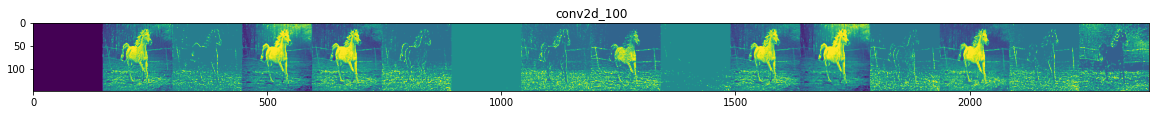

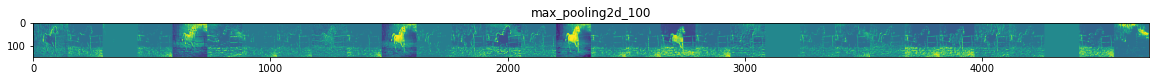

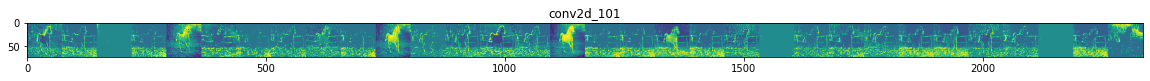

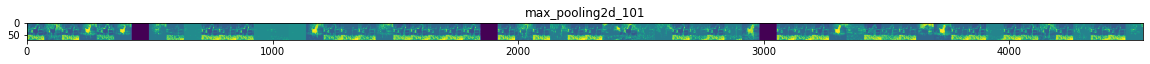

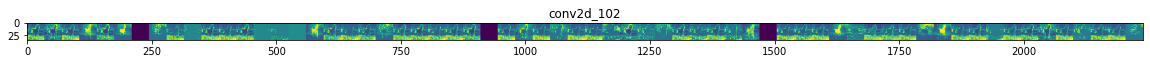

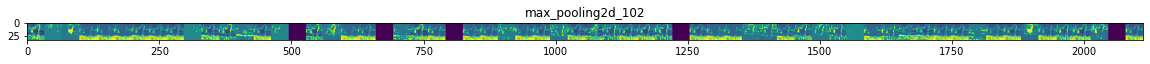

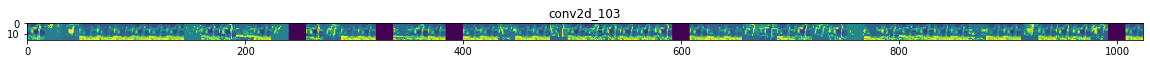

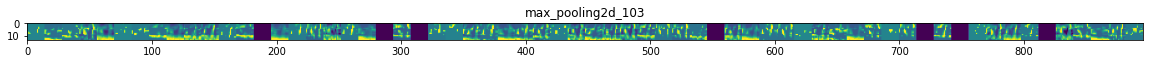

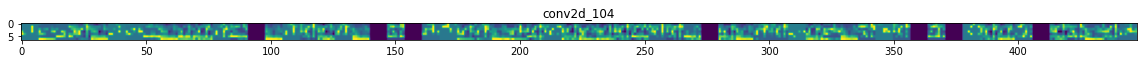

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)


# DMK # Let's prepare a random input image from the training set.
# DMK horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
# DMK human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
# DMK img_path = random.choice(horse_img_files + human_img_files)
img_path = '/content/horse1.jpg'

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')